# 03 - Projeto - Visualização de dados

## Tratamento dos Dados

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
casos_df = pd.read_csv('datasets/dados_casos.csv')

In [34]:
vax_df.head(2)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,COVID-19 PFIZER - COMIRNATY,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY,52288faace8c986872faca7101868ae8a23fefd435cd51...


In [35]:
casos_df.head(2)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095


### Renomeando as categorias de vacina para facilitar a leitura e remoção da duplicação de códigos para o mesmo fabricante

In [36]:
vax_df.loc[(vax_df.vacina_nome == 'COVID-19 ASTRAZENECA - ChAdOx1-S') | (vax_df.vacina_nome == 'COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD'), 'vacina_nome'] = 'ASTRAZENECA'
vax_df.loc[(vax_df.vacina_nome == 'COVID-19 SINOVAC/BUTANTAN - CORONAVAC') | (vax_df.vacina_nome == 'COVID-19 SINOVAC - CORONAVAC'), 'vacina_nome'] = 'CORONAVAC'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 JANSSEN - Ad26.COV2.S', 'vacina_nome'] = 'JANSEN'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 PFIZER - COMIRNATY', 'vacina_nome'] = 'PFIZER'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 PEDIÁTRICA - PFIZER COMIRNATY', 'vacina_nome'] = 'PFIZER PEDIÁTRICA'


vax_df.loc[vax_df.vacina_codigo == 89, 'vacina_codigo'] = 85
vax_df.loc[vax_df.vacina_codigo == 98, 'vacina_codigo'] = 86

In [37]:
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,PFIZER,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,PFIZER PEDIÁTRICA,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,ASTRAZENECA,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...
3,33,1988-07-20,M,2,PRETA,BAYEUX,58110,BAYEUX,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-23,1ª Dose,85,ASTRAZENECA,fe78cee14dce3436024728b1d760439861021207a32712...
4,27,1994-03-22,M,3,PARDA,JOAO PESSOA,58058,JOAO PESSOA,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-12-07,2ª Dose,87,PFIZER,470944c18359d6a1fea2a53194d29bfdb7ce1d21b47979...


## Visualização dos dados:

### Vacinação por tipo de dose

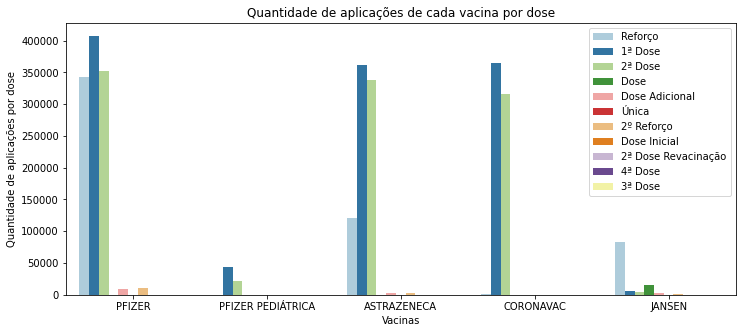

In [43]:
bar = sns.countplot(data=vax_df, x='vacina_nome', hue='vacina_descricao_dose', palette='Paired')
bar.set_xlabel('Vacinas')
bar.set_ylabel('Quantidade de aplicações por dose')
bar.set_title('Quantidade de aplicações de cada vacina por dose')
bar.figure.set_size_inches(12, 5)
plt.legend(loc = 'upper right')

Verificamos pelo gráfico que a vacina mais aplicada na Paraíba durante o período analisado foi a Pfizer, seguida pela Astrazeneca, CoronaVac e Jansen. Tal observação contrasta com o cenário nacional tendo em vista que a vacina mais utilizada no País durante a campanha de COVID-19 foi a Astrazeneca, segundo dados do Ministério da Saúde encontrados no endereço:

https://www.gov.br/saude/pt-br/assuntos/noticias/2022/janeiro/saiba-a-quantidade-de-doses-de-vacinas-covid-19-aplicadas-ate-o-momento-no-brasil-por-fabricante#:~:text=E%20tem%20mais%20not%C3%ADcia%20boa,milh%C3%B5es%20foram%20produzidas%20pela%20Janssen.

Também, é possível perceber a partir do gráfico que a vacina da Pfizer foi a mais usada também nas doses de reforço, mais do que dobrando a quantidade de vacinas da Astrazeneca que foram usadas com o mesmo propósito, por exemplo.

### Vacinação por etnia

Text(0.5, 1.0, 'Vacinação por etnia')

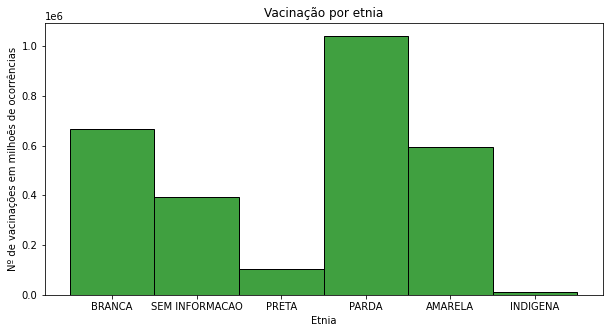

In [41]:
fig = sns.histplot(data=vax_df, x='paciente_racaCor_valor', color='g')
fig.set_xlabel('Etnia')
fig.set_ylabel('Nº de vacinações em milhoẽs de ocorrências')
fig.figure.set_size_inches(10, 5)
fig.set_title('Vacinação por etnia')

O Histograma acima lida com o número absoluto de vacinações, isto é, cada dose, independente da classificação (1ª dose, dose de reforço, etc) contará como um adicional na frequência de vacinação por etnia. Desse modo, percebemos que a maioria dos vacinados na Paraíba se autodeclaram pardos, seguidos dos autodeclarados brancos, e amarelos. 

### Mortalidade por Quantidade de Casos

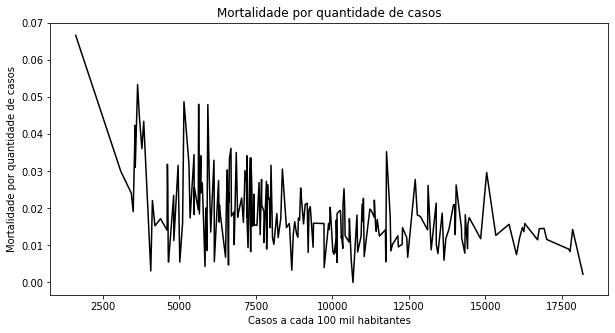

In [42]:
lin_drt = sns.lineplot(data=casos_df, x='confirmed_per_100k_inhabitants', y='death_rate', color='black')
lin_drt.set_xlabel('Casos a cada 100 mil habitantes')
lin_drt.set_ylabel('Mortalidade por quantidade de casos')
lin_drt.set_title('Mortalidade por quantidade de casos')
lin_drt.figure.set_size_inches(10, 5)

A partir da leitura do gráfico, percebemos que os municípios com a menor quantidade de casos confirmados a cada 100 mil habitantes possuem a maior mortalidade. Tendo em mente que o cálculo da mortaliadade é feito dividindo o número de mortos pelo número de casos confirmados, os municípios que testaram menos possuirão uma mortalidade acentuada em consequência de uma provável subnotificação de casos. Aumentando a mortalidade, que é inversamente proporcional ao número de casos confirmados.